In [1]:
import matplotlib.pyplot as plt
import sys
sys.path.append("run_sim")
sys.path.append("functions")
import os
import run_simulations
import functions_analyze_data
import functions_approximations
import numpy as np
import scipy.sparse

All simulations used in the paper can be reproduced using this notebook. 
Execute this script to generate all figures from simulation data or backups (if available). Please note that simulations were performed using a computing cluster. 
Simulations were performed using

- python 2.7.13  
- numpy version 1.16.1 

In this notebook, we print shell comands which can be used to run simulations for the different parameter sets.

Please specify an output directory "pathSimData". 
All simulation results will be saved at the following location.

In [32]:
pathSimData = "sim_data"

# A) Simulations to generate networks in the synchronized or desynchronized state starting at given initial mean synaptic weight

In this section, we generate the initial network configurations used to study the effect of CR stimulation
in the paper. We further generate Figures 1 and 2.

### 1) Perform simulations for different mean synaptic weights

Simulations for initial networ configurations were performed by running the 
script "run_simulations.py" in folder "run_sim". Excecute the following cells to get a list of shell commands for running the 
simulations used for the generation of initial network configurations.

First, a few paths need to be specified.

In [13]:
## pathToSimScript ... This is the full path to the simulation script "get_initial_networks_d.py".
pathToSimScript           = 'initial_states/'

## outputToInitialNetworks ... This is the directory in which simulation results will be stored. This directory is generated if it doesn't already exist. 
outputToInitialNetworks        = pathSimData+'/initial_networks'

## pathForSubmissionStringTextFile ... In this directory a .txt file including all submission strings will be stored. This was used to submit jobs to the computing cluster. 
##                                     Alternatively, the run_... scripts will output shell commands that can be used to run simulations.
pathForSubmissionStringTextFile = 'Frontiers_SSTPMDBN_initial_networks.txt'

Next, we generated strings of the shell commands to run the simulations needed to generate initial network configurations and the corresponding figures in the main text (see nbelow for figures). 

In [5]:
run_simulations.run_simulations_initial_networks( pathToSimScript, outputToInitialNetworks, pathForSubmissionStringTextFile )

### 2) Generate Figure 2

After performing the simulations, we analyze the results with regard to the coexistence of different stable states and generate the corresponding figure in the paper (Figure 2).

All data required to generate Figure 2 are stored in the directory "data/data_initial_network_Kuramoto_weight". These data 
were generate from the simulations performed under point 1) and loading the mean weight and Kuramoto data for the seeds "seed" and synaptic length scales "d" below. To load the data from simulation output run the three cells below. To generate the figure using the files in directory data_initial_network_Kuramoto_weight skip these cells and run the next cell.

#### Load data for Figure 2 from simulation output.

First, specify the path to the simulation output data for initial configurations network have been stored. The default path is the same path as "outputToInitialNetworks" under point 1).

In [6]:
pathToSimulationData_initial = outputToInitialNetworks

Then, specify the path under which the resulting traces of the mean synaptic weight and Kuramoto order parameter should be stored. These traces serve as backups and can be used to generate the figure without running the simulations before.

In [7]:
pathToTracesMeanWKuramoto_initial = "data/data_initial_network_Kuramoto_weight"

The following code loads the trajectories of the mean synaptic weight and calculates the Kuramoto order parameter from simulated spiketrains. The resulting files "data_initial_network_seed_SEED_d_D.npz" are available as "data_initial_network_Kuramoto_weight.zip".

In [12]:
pathToSimulationData_initial
# select the seed for network and noise generation for which the 
# traces are generated
for seed in [10]: #, 12, 14,16,18]:
    # select the synaptic length scale 
    for d in [0.4, 2.0, 10.0]: # mm, the default values correspond to 0.08 L, 0.4 L, and 2 L with L = 5 mm
        functions_analyze_data.load_weight_data( pathToSimulationData_initial, seed , d, pathToTracesMeanWKuramoto_initial )

#### Generate Figure 2

The next cell generates Figure 2 in the paper.

data/data_initial_network_Kuramoto_weight/data_initial_network_seed_10_d_0.4.npz
data/data_initial_network_Kuramoto_weight/data_initial_network_seed_10_d_2.0.npz
data/data_initial_network_Kuramoto_weight/data_initial_network_seed_10_d_10.0.npz


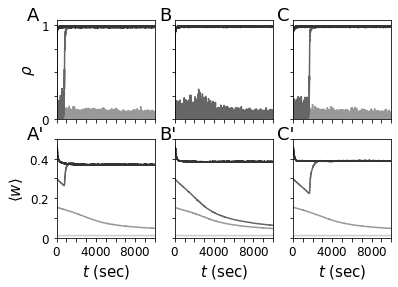

In [10]:
seed = 10
pathTo_data_initial_network_Kuramoto_weight = "data/data_initial_network_Kuramoto_weight"

fig = functions_analyze_data.genFigureMultistabiltiy( pathTo_data_initial_network_Kuramoto_weight, seed )
# fig.savefig( "Fig2.pdf" , bbox_inches="tight" )
# fig.savefig( "Fig2.png" , bbox_inches="tight" )


### 3) Generate Figure 1

The code below loads the adjacency matrices for different synaptic length scales and generates Figure 1 in the paper. It also generates backup files including the adjacency matrices and neuron locations from which FIgure 1 in the manuscript was generated.

First, specify the path to the directory in which these backups should be saved. To generate Figure 1 from the backup data set pathToBackups_networkConnectivity to "data/data_adjacency_matrix".


In [3]:
pathToBackups_networkConnectivity = "data/data_adjacency_matrix"

To load data from simulation results, run the cell below. To use backup data in "data/data_adjacency_matrix" skip the next cell.

#### Load data for Figure 1 from simulation output.

The following code loads the data from simulation results and generates the corresponding backup files in "pathToBackups_networkConnectivity".

In [10]:
seed = 10
functions_analyze_data.load_adj_data( seed, pathToSimulationData_initial, pathToBackups_networkConnectivity )

#### Generate Figure 1.

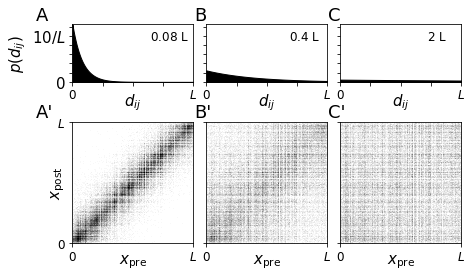

In [5]:
fig = functions_analyze_data.generateFigureConnectivityMatrix( pathToBackups_networkConnectivity )
# fig.savefig( "Fig1.pdf" , bbox_inches="tight" )
# fig.savefig( "Fig1.png" , bbox_inches="tight", dpi=300 )

# B) Simulations of CR stimulation and relaxation after cessation of stimulation

We performed simulations that started on backups generated during the simulations from Section A1 after 5000 sec of simulated time.

Simulations were performed for non-shuffled CR and shuffled CR. In the following, we present the code to reproduce the results.

### 1) Simulations of non-shuffled CR stimulation

First, we perform simulations of non-shuffled CR stimulation. For these the following paths need to be specified.

In [12]:
## pathToSimScript ... This is the path to the simulation script "CR_stimulation_spatial_stimulus_profile.py"
pathToSimScript           = "CR_stimulation/"

## outputPath_nonShuffledCR ... This is the directory in which simulation results will be stored. This directory is generated if it doesn't already exist. 
outputPath_nonShuffledCR        = pathSimData+'/CR_stimulation'

## outputToInitialNetworks ... This is the directory in which simulation results will be stored. This directory is generated if it doesn't already exist. 
outputToInitialNetworks        = pathSimData+'/initial_networks'

## pathForSubmissionStringTextFile ... In this directory a .txt file including all submission strings will be stored. This was used to submit jobs to computation cluster. 
##                                     Alternatively, the run_... scripts will output shell commands that can be used to run simulations.
pathForSubmissionStringTextFile = 'Frontiers_SSTPMDBN_CR_stimulation.txt'

Next, we generated strings of the shell commands to run the simulations. 

In [14]:
run_simulations.run_simulations_CR_stimulation_Results_1( pathToSimScript, outputToInitialNetworks, outputPath_nonShuffledCR, pathForSubmissionStringTextFile )

After these simulations have been performed, we run simulations for the relaxation after non-shuffled CR stimulation.

In [18]:
## pathToSimScript ... path to the simulation script "relaxation.py"
pathToSimScript           = "relaxation/"

## outputPath_relAfterNonShuffledCR ... directory in which simulation results will be stored (is generated if it doesn't already exist) 
outputPath_relAfterNonShuffledCR        = pathSimData+ '/relaxation_after_CR_stimulation'

## pathForSubmissionStringTextFile ... in this file name all the submission strings will be stored (used to submit jobs to computation cluster)
pathForSubmissionStringTextFile = 'Frontiers_SSTPMDBN_relaxation_after_CR_stimulation.txt'


The following code runs simulations that start from the backup files created in Section B1 at 6000 sec and simulates the network in the absence of stimulation.

In [20]:
run_simulations.run_or_cont_simulations_CR_stimulation_Results_1_relaxation( pathToSimScript, outputPath_nonShuffledCR, outputPath_relAfterNonShuffledCR, pathForSubmissionStringTextFile )

Next, we load the trajectories of mean synaptic weight and calculate the Kuramoto order parameter from simulation data. The resulting trajectories are saved at the following location.

In [9]:
pathToBackupOfKuramotoMeanW_nonShuffledCR = "data/data_trajectories_mean_weight_kuramoto/nonShuffledCR"

The next line runs the code to load data and calculate the Kuramoto order parameter.

In [ ]:
Astim = 1.0
npb = 3
functions_analyze_data.load_trajectories_Kuramoto_and_weights_nonShuffledCR( outputToInitialNetworks , outputPath_nonShuffledCR , outputPath_relAfterNonShuffledCR, pathToBackupOfKuramotoMeanW_nonShuffledCR, Astim, npb )

### 2) Simulations of shuffled CR stimulation

First, we perform simulations of non-shuffled CR stimulation. For these the following paths need to be specified.

In [7]:
## pathToSimScript ... This is the path to the simulation script "shuffled_CR_stimulation_spatial_stimulus_profile.py"
pathToSimScript           = "CR_stimulation/"

## outputToInitialNetworks ... This is the path to the results from simulations for intial network configurations, from which simulations on CR stimulation are started.
##                             It should equal "outputPath" from section 1).
outputToInitialNetworks = pathSimData+'/initial_networks'

## outputPath ... This is the directory in which simulation results will be stored. This directory is generated if it doesn't already exist. 
outputPath_shuffledCR        = pathSimData+'/shuffled_CR_stimulation'

## pathForSubmissionStringTextFile ... In this directory a .txt file including all submission strings will be stored. This was used to submit jobs to computation cluster. 
##                                     Alternatively, the run_... scripts will output shell commands that can be used to run simulations.
pathForSubmissionStringTextFile = 'Frontiers_SSTPMDBN_shuffled_CR_stimulation.txt'

Next, we generated strings of the shell commands to run the simulations. 

In [17]:
run_simulations.run_simulations_shuffled_CR_stimulation_Results_1( pathToSimScript, outputToInitialNetworks, outputPath_shuffledCR, pathForSubmissionStringTextFile )

After these simulations have been done, we perform simulations for relaxation after shuffled CR stimulation.

In [5]:
## pathToSimScript ... path to the simulation script "relaxation.py"
pathToSimScript           = "relaxation/"

## outputToInitialNetworks ... this is the path to the backups after CR stimulation from which simulations for relaxation are started
outputToInitialNetworks = pathSimData+'/initial_networks'
    
## outputPath_relAfterNonShuffledCR ... directory in which simulation results will be stored (is generated if it doesn't already exist) 
outputPath_relAfterShuffledCR        = pathSimData+ '/relaxation_after_shuffled_CR_stimulation'

## pathForSubmissionStringTextFile ... in this file name all the submission strings will be stored (used to submit jobs to computation cluster)
pathForSubmissionStringTextFile = 'Frontiers_SSTPMDBN_relaxation_after_shuffled_CR_stimulation.txt'


In [7]:
run_simulations.run_or_cont_simulations_shuffled_CR_stimulation_Results_1_relaxation( pathToSimScript, outputToInitialNetworks, outputPath_relAfterShuffledCR, pathForSubmissionStringTextFile )

Next, we load the trajectories of mean synaptic weight and calculate the Kuramoto order parameter from simulation data. The resulting trajectories are saved at the following location

In [9]:
pathToBackupOfKuramotoMeanW_shuffledCR = "data/data_trajectories_mean_weight_kuramoto"

In [5]:
Astim = 1.0
npb = 3

functions_analyze_data.load_trajectories_Kuramoto_and_weights_shuffledCR( outputToInitialNetworks , outputPath_shuffledCR , outputPath_relAfterShuffledCR, pathToBackupOfKuramotoMeanW_shuffledCR, Astim, npb )

### 3) generate figure showing trajectories of the Kuramoto order parameter and the mean synaptic weight

The following code generates Figure 4.

The directory in which trajectories of Kuramoto and mean synaptic weights are saved needs to be specified. 
The default value is ...

In [21]:
backupDirectory = "data/data_trajectories_mean_weight_kuramoto"

If trajectories were loaded from simulation results the corresponding files need to be copied in the same directory and backupDirectory needs to be specified accordingly.

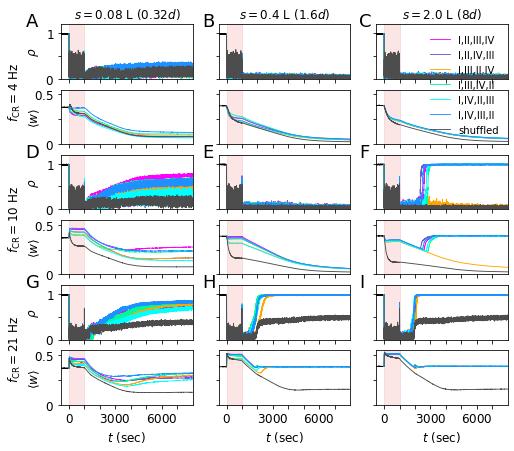

In [7]:
fig = functions_analyze_data.gen_Figure_trajectories_Kuramoto_weight( backupDirectory )

# legend was aranged manually
# fig.savefig( "Fig4.png" , bbox_inches="tight", dpi=300 )
# fig.savefig( "Fig4.pdf" , bbox_inches="tight" )
# fig.savefig( "Fig4.svg" , bbox_inches="tight" )

### 3) generate Figures 5 and 6 from simulation output

#### figure for burst stimuli with 3 pulses

The following code generates Figure 5 from the simulation results. Backup data from simulations are saved in directory "data/data_connectivity_diagrams" and are used if available.

load files from backup
load files from backup
load files from backup


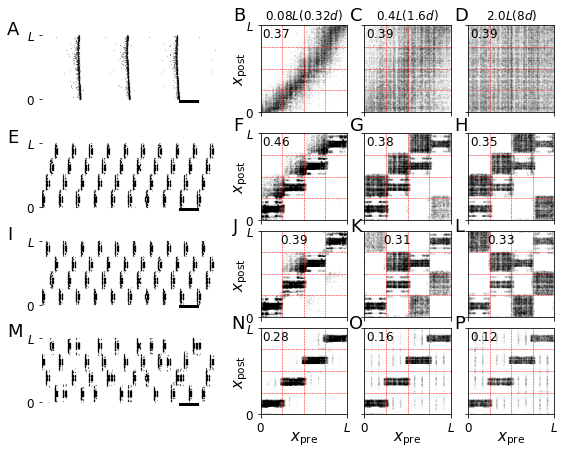

In [7]:
fig = functions_analyze_data.gen_Figure_connectivity_diagrams( pathSimData )

# fig.savefig( "Fig5.pdf" , bbox_inches="tight" )
# fig.savefig( "Fig5.png" , bbox_inches="tight", dpi=300 )

#### figure for single-pulse stimuli with 1 pulse

The following code creates Figure 6 from simulation results.

load files from backup
load files from backup
load files from backup


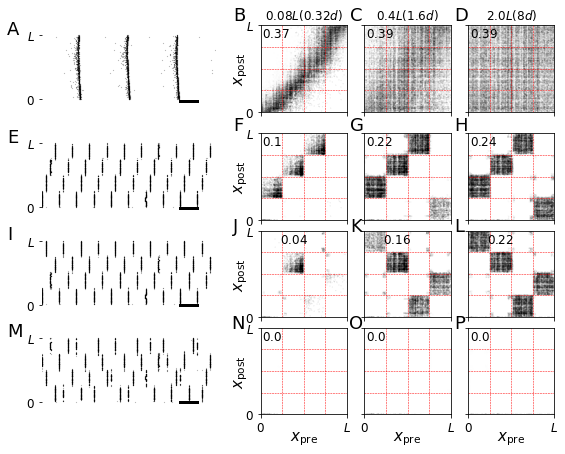

In [4]:
fig = functions_analyze_data.gen_Figure_connectivity_diagrams_single_pulse( pathSimData )

# fig.savefig( "Fig6.pdf" , bbox_inches="tight" )
# fig.savefig( "Fig6.png" , bbox_inches="tight", dpi=300 )

### 4) generation of Figure 7

Next, we calculate the approximations of the relative numbers of connections between subpopulations of neurons
that are the closest to different stimulation sites and generate Figure 7.

First, we specify the directory in which the results should be saved. Backups of the data are available in "data/data_numbers_of_connections" and can be used to generate the figure.

In [25]:
directoryNumbersOfConnections = "data/data_numbers_of_connections"

In [12]:
functions_approximations.calc_approx_b_and_get_simulations( directoryNumbersOfConnections, outputToInitialNetworks )

From these data, we generate the Figure 7 (backup data to generate this figure are given in data/data_numbers_of_connections ). 

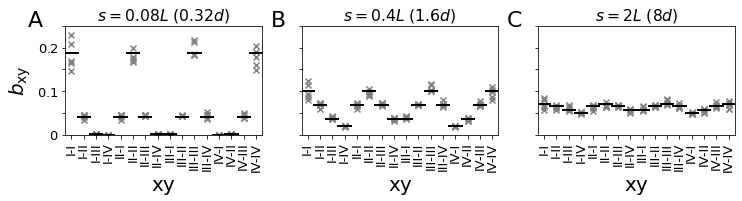

In [26]:
fig = functions_approximations.generateFigureRelativeNumbersOfConnections( directoryNumbersOfConnections )
# fig.savefig( "Fig7.pdf" , bbox_inches="tight" )
# fig.savefig( "Fig7.png" , bbox_inches="tight" )

### 5) calculate estimate of mean rate of weight change and generate Figure 8

Next, we estimate the mean weight change during stimulation as a function of the phase lag between
stimuli delivered to the postsynaptic and presynaptic neuronal population (neurons that are the closest to respective
stimulation sites).

First, perform simulations for two stimulation sites that receive stimuli at phase lag phi using the script 
<code>get_J_phi_f_spatial_stimulus_profile.py</code> in folder "get_J_phi_f".
    
The following paths need to be specified.

In [29]:
# path to simulation script
## pathToSimScript ... path to the simulation script "CR_stimulation_spatial_stimulus_profile.py"
pathToSimScript           = "get_J_phi_f/"
## inputToInitialNetworks ... this is the path to the intial networks, from which simulations on CR stimulation are started
inputToInitialNetworks = pathSimData+'/initial_networks'
## outputPath ... directory in which simulation results will be stored (is generated if it doesn't already exist) 
pathToSimResults_getJ        = pathSimData  + '/get_J_phi_f'
## pathForSubmissionStringTextFile ... in this file name all the submission strings will be stored (used to submit jobs to computation cluster)
pathForSubmissionStringTextFile = 'Frontiers_SSTPMDBN_get_J_phi_f.txt'

Then, run simulations for synaptic length scale d=0.4 L (d=2.0).

In [28]:
run_simulations.run_simulations_get_J_phi_f( pathToSimScript, inputToInitialNetworks, pathToSimResults_getJ, pathForSubmissionStringTextFile )

To run simulations for the other synaptic length scales use

In [26]:
run_simulations.run_simulations_get_J_phi_f_ForComparissonToSimulations( pathToSimScript, inputToInitialNetworks, pathToSimResults_getJ, pathForSubmissionStringTextFile )

Once simulations are done, we need to evaluate the results.

The following code loads the simulation results.

In [7]:
result_array = functions_analyze_data.load_estimated_weight_changes( pathToSimResults_getJ, inputToInitialNetworks )

The following code saves the results to be loaded in the future. Alternatively, these
data are available in folder "data/data_backup_fig_get_J"/

In [27]:
# specify backup folder
backupFolder = "data/data_backup_fig_get_J"

# Next, save results. NOTE: if file name is changed, it also needs to be changed in functions_analyze_data.gen_figure_estimate_J

Next, we generate the left part of Figure 8.

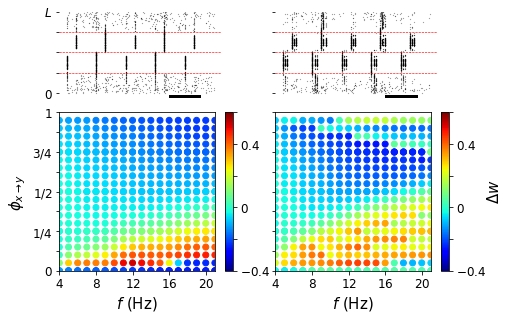

In [8]:
fig = functions_analyze_data.gen_figure_estimate_J( backupFolder, pathToSimResults_getJ )

# fig.savefig( "Fig8_part.pdf" , bbox_inches="tight" )
# fig.savefig( "Fig8_part.png" , bbox_inches="tight" )

### 6) Generate Figure 9 and corresponding simulations

#### 1) theoretical approximations

First, we calculate the theoretical approximations for the mean synaptic weights of 
different synaptic populations.

In [4]:
# in this folder, precalculated results are stored
backupFolder = "data/data_backup_fig_get_J"

In [15]:
# get values of Delta w from simulation results
Jvalues = np.load( backupFolder + "/temp_result_array_Dec4.npy" ) 

# evaluation time 
Teval = 8000 # sec

# load precacluated/or calculate approximations of the mean synaptic weights of 
# intra- and inter-population synapses
backupMWintraInter_filename = backupFolder + "/dic_approx_mw_intra_inter.npy"
if os.path.isfile( backupMWintraInter_filename ) == False:
    # If backup not found, do calculation ...
    dic_plt_results = functions_approximations.get_approximation( Jvalues, Teval )
    # ... and generate backup.
    np.save( backupMWintraInter_filename, dic_plt_results ) 
else:
    # If backup found, load from backup.
    dic_plt_results= np.load( backupMWintraInter_filename ,allow_pickle='TRUE').item()

#### 2) simulations

Perform longer simulations of CR stimulation and shuffled CR stimulation. Simulation results are stored as backups in "data/data_backup_fig_get_J".

##### non-shuffled CR

First, we specify paths for simulations on non-shuffled CRS.

In [6]:
# path to simulation script
## pathToSimScript ... path to the simulation script "CR_stimulation_spatial_stimulus_profile.py"
pathToSimScript           = "CR_stimulation/"
## outputToInitialNetworks ... this is the path to the intial networks, from which simulations on CR stimulation are started
outputToInitialNetworks = pathSimData + '/initial_networks'
## outputPath ... directory in which simulation results will be stored (is generated if it doesn't already exist) 
outputPath        = pathSimData + '/CR_stimulation_long'
## pathForSubmissionStringTextFile ... in this file name all the submission strings will be stored (used to submit jobs to computation cluster)
pathForSubmissionStringTextFile = 'Frontiers_SSTPMDBN_CR_stimulation_long.txt'

To get shell commands for individual simulations run the following code.

In [13]:
run_simulations.run_simulations_CR_stimulation_CompareToTheory( pathToSimScript, outputToInitialNetworks, outputPath, pathForSubmissionStringTextFile )

Next, we load the results from simulation for non-shuffled CR.

In [9]:
# directory in which results of long simulations are saved
directory = pathSimData + "/CR_stimulation_long"
backupSimMWintraInter_filename = backupFolder + "/dic_sim_mw_intra_inter_Dec4.npy"

if os.path.isfile( backupSimMWintraInter_filename ) == False:
    dic_resultsSim = functions_analyze_data.loadSimulation_results_intra_inter(directory)
    #np.save( backupSimMWintraInter_filename, dic_resultsSim ) 
else:
    dic_resultsSim= np.load( backupSimMWintraInter_filename ,allow_pickle='TRUE').item()

##### shuffled CR

Second, we specify paths for simulations on shuffled CRS.

In [10]:
# path to simulation script
## pathToSimScript ... path to the simulation script "CR_stimulation_spatial_stimulus_profile.py"
pathToSimScript           = "CR_stimulation/"
## outputToInitialNetworks ... this is the path to the intial networks, from which simulations on CR stimulation are started
outputToInitialNetworks = pathSimData + '/initial_networks'
## outputPath ... directory in which simulation results will be stored (is generated if it doesn't already exist) 
outputPath        = pathSimData + '/shuffled_CR_stimulation_long'
## pathForSubmissionStringTextFile ... in this file name all the submission strings will be stored (used to submit jobs to computation cluster)
pathForSubmissionStringTextFile = 'Frontiers_SSTPMDBN_shuffled_CR_stimulation_long.txt'

To get shell commands for individual simulations run the following code.

In [ ]:
run_simulations.run_simulations_shuffled_CR_stimulation_CompareToTheory( pathToSimScript, outputToInitialNetworks, outputPath, pathForSubmissionStringTextFile )

Load simulation results for shuffled CR.

In [19]:
# directory in which results of long simulations are saved
directory = pathSimData + "/shuffled_CR_stimulation_long"
backupSimMWintraInterShuffled_filename = backupFolder + "/dic_sim_shuffledCR_mw_intra_inter.npy"
if os.path.isfile( backupSimMWintraInterShuffled_filename ) == False:
    dic_resultsSimShuffled = functions_analyze_data.loadSimulation_results_intra_inter_shuffledCR(directory)
    # np.save( backupSimMWintraInterShuffled_filename, dic_resultsSimShuffled ) 
else:
    dic_resultsSimShuffled= np.load( backupSimMWintraInterShuffled_filename ,allow_pickle='TRUE').item()

Finally, we generate Figure 9. To show results prior to simulation data for initial networks, stored in "data/data_initial_networks" are used.

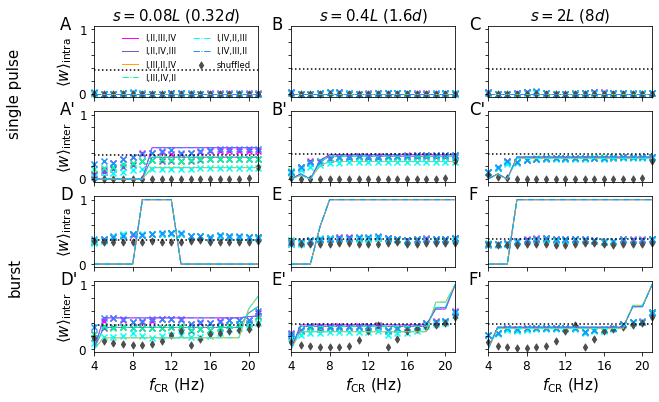

In [10]:
fig = functions_analyze_data.genFigure_meanweight_theory_vs_sim( dic_plt_results, dic_resultsSim, dic_resultsSimShuffled, pathSimData )

# fig.savefig( "Fig9.pdf" , bbox_inches="tight" )
# fig.savefig( "Fig9.png" , bbox_inches="tight" )

## generate figure supplementary material

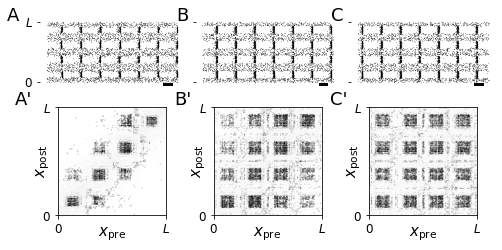

In [13]:
fig = functions_analyze_data.genFigureSupplement( pathSimData )

# fig.savefig( "FigS1.pdf" , bbox_inches="tight" )
# fig.savefig( "FigS1.png" , bbox_inches="tight", dpi=450 )